In [29]:
import pandas as pd
import datetime as dt


In [30]:
import matplotlib.pyplot as plt 
%matplotlib inline

# from pandas import Series, DataFrame 
import numpy as np #NumPy es el paquete fundamental para la informática científica con Python.


In [31]:
df = pd.read_csv('RFM_Pizzas_good.csv', sep = ';', error_bad_lines = False)

In [32]:
df.tail()

,CUSTOMER,TRADE_DATE,COUNTRY,AMOUNT
60651,119412,2019-02-26 00:00:00.000,Austria,"1,80769E+15"
60652,127572,2019-05-10 00:00:00.000,United States,"2,14317E+15"
60653,119361,2019-02-27 00:00:00.000,Italy,"2,25003E+15"
60654,115230,2019-02-14 00:00:00.000,Italy,"2,95899E+15"
60655,129729,2019-06-13 00:00:00.000,United States,"3,20728E+15"


In [33]:
df.columns = map(str.upper, df.columns)

In [34]:
print(df.dtypes)
df.describe()


CUSTOMER       int64
TRADE_DATE    object
COUNTRY       object
AMOUNT        object
dtype: object


,CUSTOMER
count,60656.000000
mean,73388.013733
std,37928.036162
min,10869.000000
25%,36819.000000
50%,74124.000000
75%,109746.750000
max,131142.000000


In [35]:
df.dtypes

CUSTOMER       int64
TRADE_DATE    object
COUNTRY       object
AMOUNT        object
dtype: object

In [36]:
df['AMOUNT'] = [(float(k.replace(',','.'))) for k in df.AMOUNT]

In [37]:
df['TRADE_ID'] = df.index

In [38]:
# dt.datetime.now()

In [39]:
# dt.datetime.strptime(k[0:10], '%Y-%m-%d')

In [40]:
now = dt.datetime(2019,7,7)
df['TRADE_DATE_SHORT'] = pd.to_datetime(df['TRADE_DATE'])

In [41]:
df.tail()

,CUSTOMER,TRADE_DATE,COUNTRY,AMOUNT,TRADE_ID,TRADE_DATE_SHORT
60651,119412,2019-02-26 00:00:00.000,Austria,1.807690e+15,60651,2019-02-26
60652,127572,2019-05-10 00:00:00.000,United States,2.143170e+15,60652,2019-05-10
60653,119361,2019-02-27 00:00:00.000,Italy,2.250030e+15,60653,2019-02-27
60654,115230,2019-02-14 00:00:00.000,Italy,2.958990e+15,60654,2019-02-14
60655,129729,2019-06-13 00:00:00.000,United States,3.207280e+15,60655,2019-06-13


In [42]:
print(df.dtypes)
df.describe()

CUSTOMER                     int64
TRADE_DATE                  object
COUNTRY                     object
AMOUNT                     float64
TRADE_ID                     int64
TRADE_DATE_SHORT    datetime64[ns]
dtype: object


,CUSTOMER,AMOUNT,TRADE_ID
count,60656.000000,6.065600e+04,60656.000000
mean,73388.013733,2.812826e+11,30327.500000
std,37928.036162,2.487408e+13,17510.023301
min,10869.000000,1.000000e+00,0.000000
25%,36819.000000,2.870400e+01,15163.750000
50%,74124.000000,1.085522e+02,30327.500000
75%,109746.750000,5.179813e+02,45491.250000
max,131142.000000,3.207280e+15,60655.000000


In [43]:
customer_country=df[['COUNTRY','CUSTOMER']].drop_duplicates()
customer_country.groupby(['COUNTRY'])['CUSTOMER'].aggregate('count').reset_index().sort_values('CUSTOMER', ascending=False)

,COUNTRY,CUSTOMER
20,United States,3418
10,Italy,956
16,Spain,312
13,Poland,305
8,Greece,249
11,Mexico,45
7,Germany,31
21,Uruguay,20
15,Russia,15
12,Norway,11


In [44]:
df = df.loc[df['COUNTRY'] == 'United States']


In [45]:
def toplot_importe_bruto(x,y):
    max_importe = x
    min_importe = y
    plt.hist(df.AMOUNT[(df['AMOUNT']>x) & (df['AMOUNT']<y)], 1000)
    plt.show()

43906
count    4.390600e+04
mean     2.287772e+11
std      2.157923e+13
min      1.000000e+00
25%      2.531725e+01
50%      1.000000e+02
75%      5.000000e+02
max      3.207280e+15
Name: AMOUNT, dtype: float64


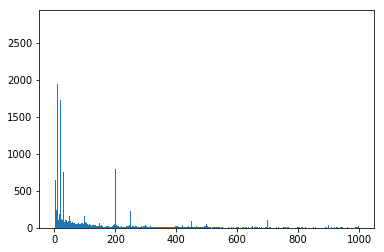

36047
count    36047.000000
mean       163.975361
std        214.090484
min          1.000000
25%         20.000000
50%         77.460000
75%        207.600000
max       1000.000000
Name: AMOUNT, dtype: float64


In [47]:
xmin = 0
xmax = 1000
print(len(df.AMOUNT))
print(df.AMOUNT.describe())
toplot_importe_bruto(xmin,xmax)
print(len(df[(df['AMOUNT']>xmin) & (df['AMOUNT']<xmax)]))
print(df.AMOUNT[(df['AMOUNT']>xmin) & (df['AMOUNT']<xmax)].describe())

In [48]:
#OK a estos rangos para acotar los importes OUTLIERS
df = df[(df['AMOUNT']>0) & (df['AMOUNT']<1000)]

## Creamos el RFM TABLE:


In [49]:
df.head()

,CUSTOMER,TRADE_DATE,COUNTRY,AMOUNT,TRADE_ID,TRADE_DATE_SHORT
0,13227,2018-08-03 00:00:00.000,United States,1.0,0,2018-08-03
1,13227,2018-08-31 00:00:00.000,United States,1.0,1,2018-08-31
2,13227,2018-10-04 00:00:00.000,United States,1.0,2,2018-10-04
3,13227,2018-10-08 00:00:00.000,United States,1.0,3,2018-10-08
4,13227,2018-11-06 00:00:00.000,United States,1.0,4,2018-11-06


In [50]:
df.groupby('CUSTOMER').agg({'TRADE_DATE_SHORT': lambda x: (now - x.max()).days, 'TRADE_ID': lambda x: len(x), 'AMOUNT': lambda x: x.sum()})

,TRADE_DATE_SHORT,TRADE_ID,AMOUNT
CUSTOMER,,,
10869,73,17,6876.551250
10872,86,19,7523.855620
10884,94,11,5002.217270
10887,47,19,5651.594660
10893,90,1,178.009070
10896,97,11,4586.569500
10905,45,23,6007.950000
10908,52,20,5802.324960
10938,38,59,17627.609200


In [51]:
rfmTable = df.groupby('CUSTOMER').agg({'TRADE_DATE_SHORT': lambda x: (now - x.max()).days, 'TRADE_ID': lambda x: len(x), 'AMOUNT': lambda x: x.sum()})

In [52]:
rfmTable['TRADE_DATE_SHORT'] = rfmTable['TRADE_DATE_SHORT'].astype(int)
rfmTable['AMOUNT'] = rfmTable['AMOUNT'].astype(int)

In [53]:
rfmTable.head()

,TRADE_DATE_SHORT,TRADE_ID,AMOUNT
CUSTOMER,,,
10869,73,17,6876
10872,86,19,7523
10884,94,11,5002
10887,47,19,5651
10893,90,1,178


In [54]:
rfmTable.AMOUNT.max()

175028

In [57]:
rfmTable.rename(columns={'TRADE_DATE_SHORT': 'RECENCY', 
                         'TRADE_ID': 'FREQUENCY', 
                         'AMOUNT': 'MONETARY_VALUE'}, inplace=True)
rfmTable.head()

,RECENCY,FREQUENCY,MONETARY_VALUE
CUSTOMER,,,
10869,73,17,6876
10872,86,19,7523
10884,94,11,5002
10887,47,19,5651
10893,90,1,178


## Ploteo de variables

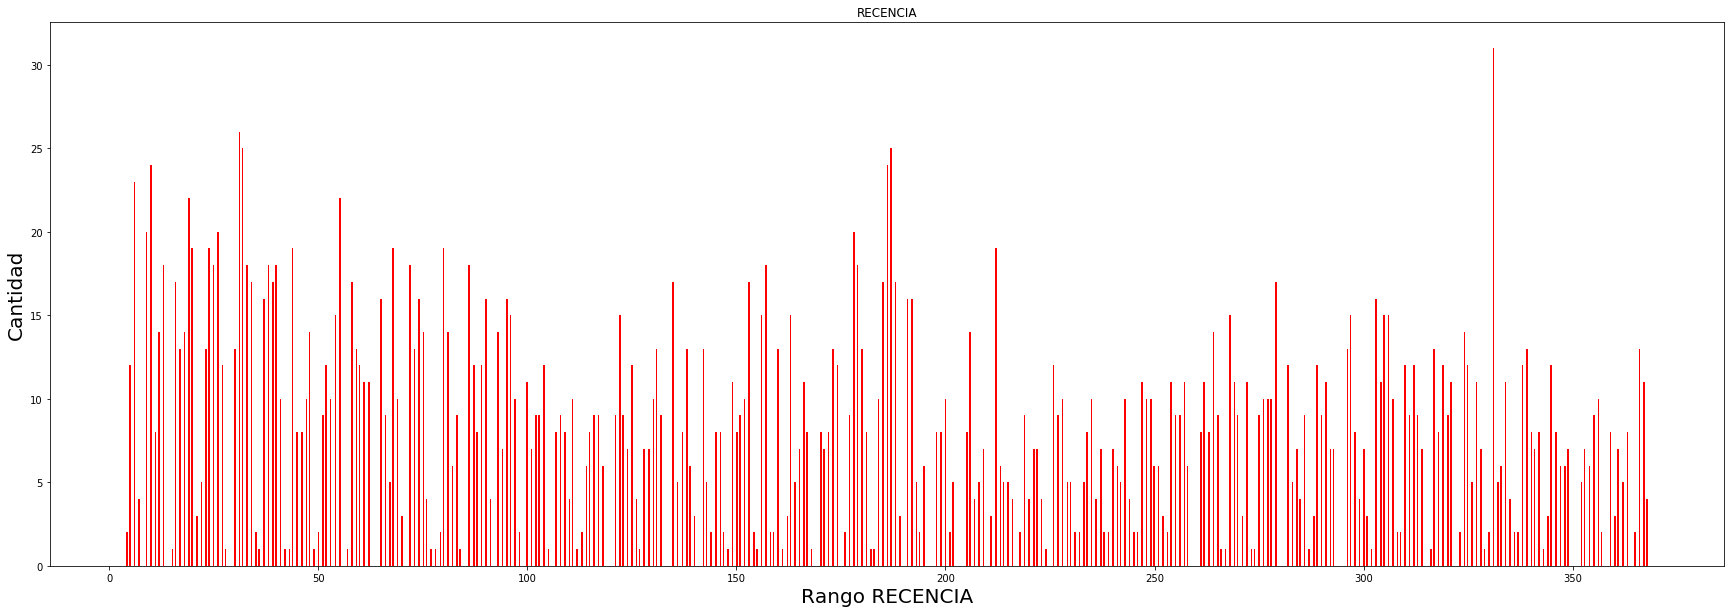

In [58]:
plt.figure(figsize=(30,10))
plt.hist(rfmTable.RECENCY, 1000, color='red')
plt.title('RECENCIA')
plt.xlabel('Rango RECENCIA',size=20)
plt.ylabel('Cantidad',size=20)
plt.show()

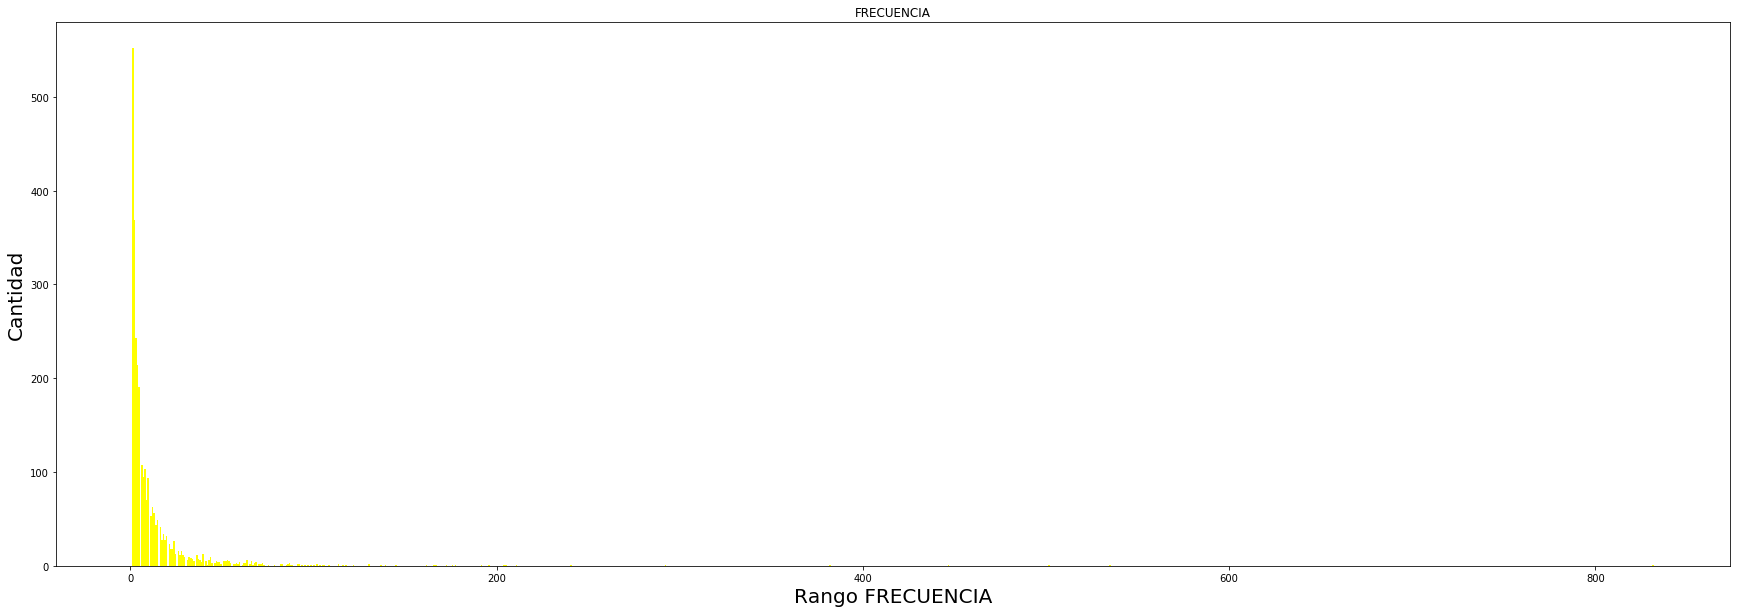

In [59]:
plt.figure(figsize=(30,10))
plt.hist(rfmTable.FREQUENCY, 1000, color='yellow')
plt.title('FRECUENCIA')
plt.xlabel('Rango FRECUENCIA',size=20)
plt.ylabel('Cantidad',size=20)
plt.show()

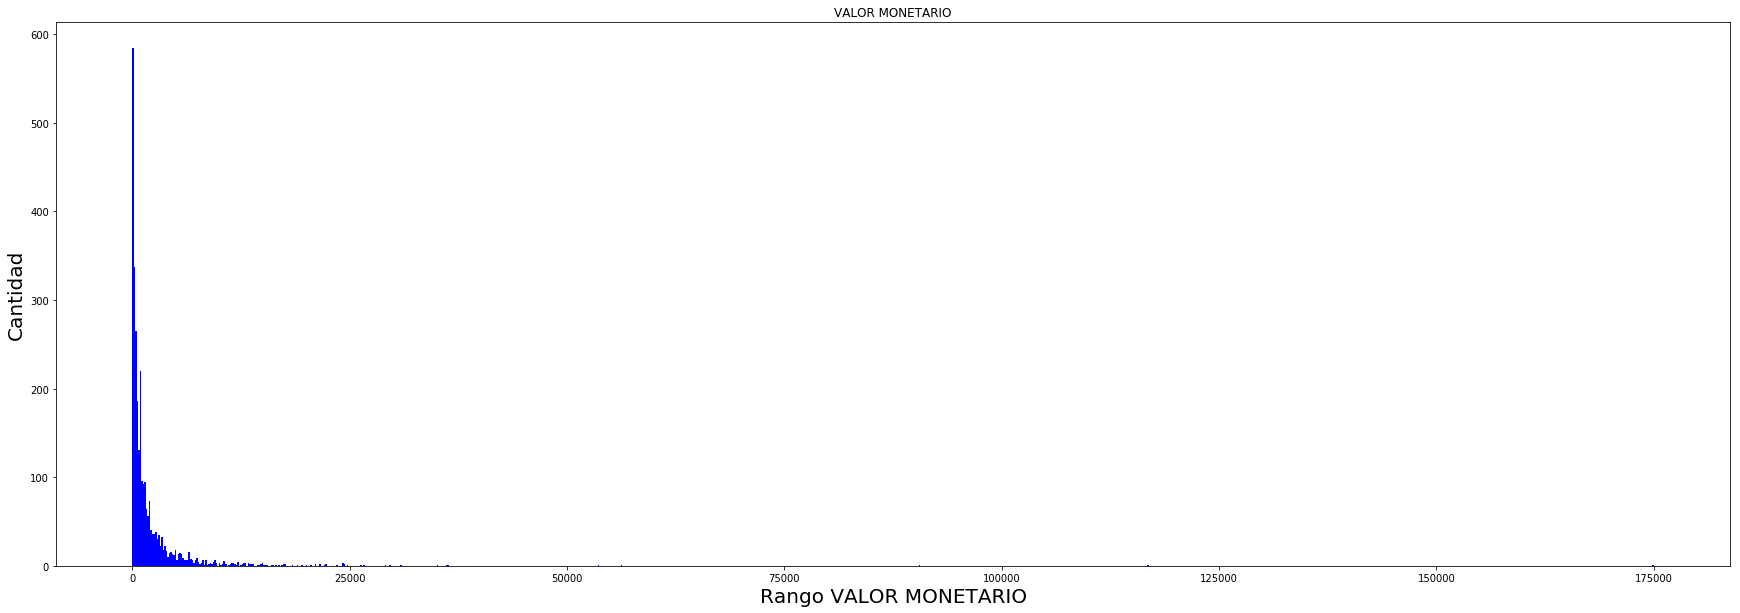

In [60]:
plt.figure(figsize=(30,10))
plt.hist(rfmTable.MONETARY_VALUE, 1000, color='blue')
plt.title('VALOR MONETARIO')
plt.xlabel('Rango VALOR MONETARIO',size=20)
plt.ylabel('Cantidad',size=20)
plt.show()

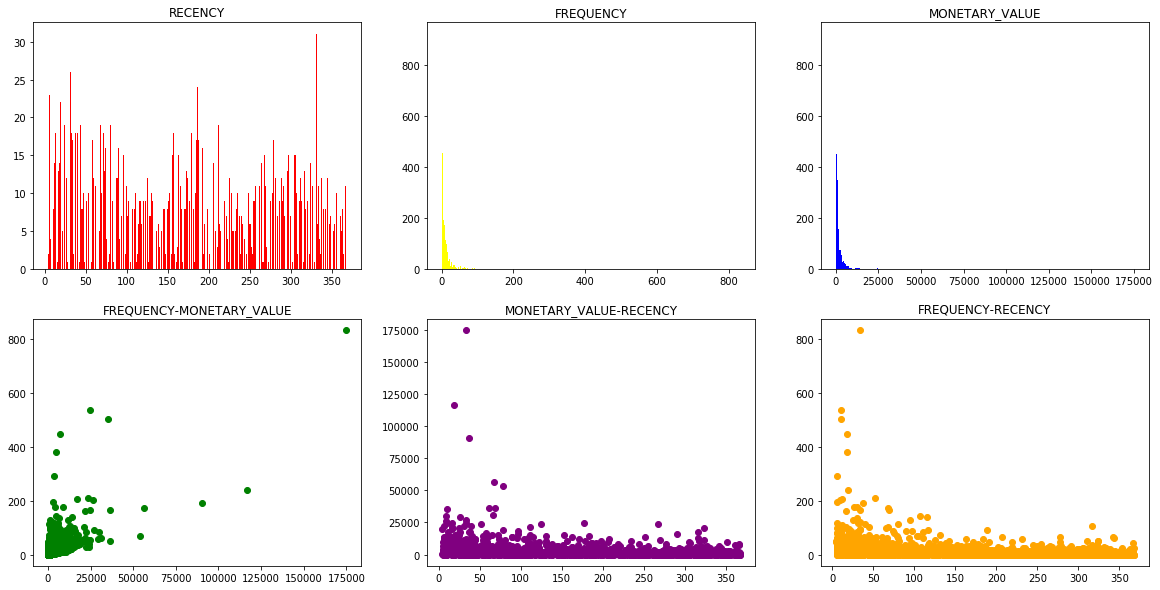

In [61]:
figure, axes_array = plt.subplots(2,3) #Nos determina cuantos "subplots" aqui 2x2 = 4
figure.set_size_inches(20,10) #tamaño de cada subplot
axes_array[0,0].hist(rfmTable.RECENCY, 500, color = 'red')
axes_array[0, 0].set_title('RECENCY')
axes_array[0,1].hist(rfmTable.FREQUENCY, 500, color = 'yellow')
axes_array[0, 1].set_title('FREQUENCY')
axes_array[0,2].hist(rfmTable.MONETARY_VALUE, 500, color = 'blue')
axes_array[0, 2].set_title('MONETARY_VALUE')
axes_array[1,0].scatter(rfmTable.MONETARY_VALUE, rfmTable.FREQUENCY, c='green')
axes_array[1, 0].set_title('FREQUENCY-MONETARY_VALUE')
axes_array[1,1].scatter(rfmTable.RECENCY, rfmTable.MONETARY_VALUE, c='purple')
axes_array[1, 1].set_title('MONETARY_VALUE-RECENCY')
axes_array[1,2].scatter(rfmTable.RECENCY, rfmTable.FREQUENCY, c='orange')
axes_array[1, 2].set_title('FREQUENCY-RECENCY')


plt.show()

## Clusterizacion de clientes (Sin standarizar RECENCY)

In [62]:
from sklearn.preprocessing import StandardScaler

X = np.array(rfmTable[['RECENCY','FREQUENCY','MONETARY_VALUE']])
x = StandardScaler().fit_transform(X)

C:\Users\jalvarez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jalvarez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


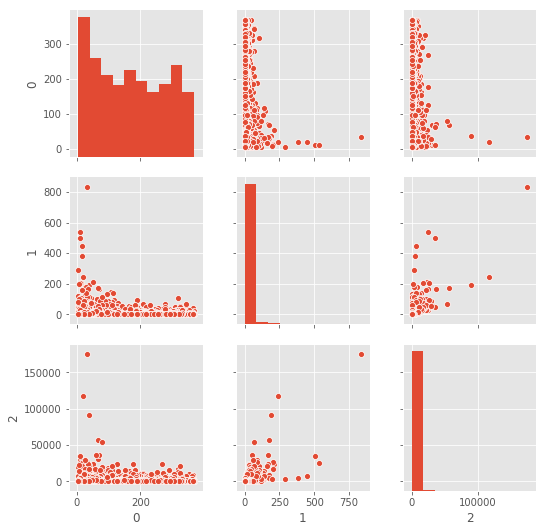

In [63]:
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min  #metodo de calculo al centoide. Es la "tipica"
from sklearn.preprocessing import scale #para transformar datos.

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


X = np.array(rfmTable[['RECENCY','FREQUENCY','MONETARY_VALUE']])
X.shape


sb.pairplot(pd.DataFrame(X))
plt.show()
#Buscamos en numero de clusters donde se produce el codo
Nc = range(2, 20)

In [64]:
wcss = []
for i in Nc:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

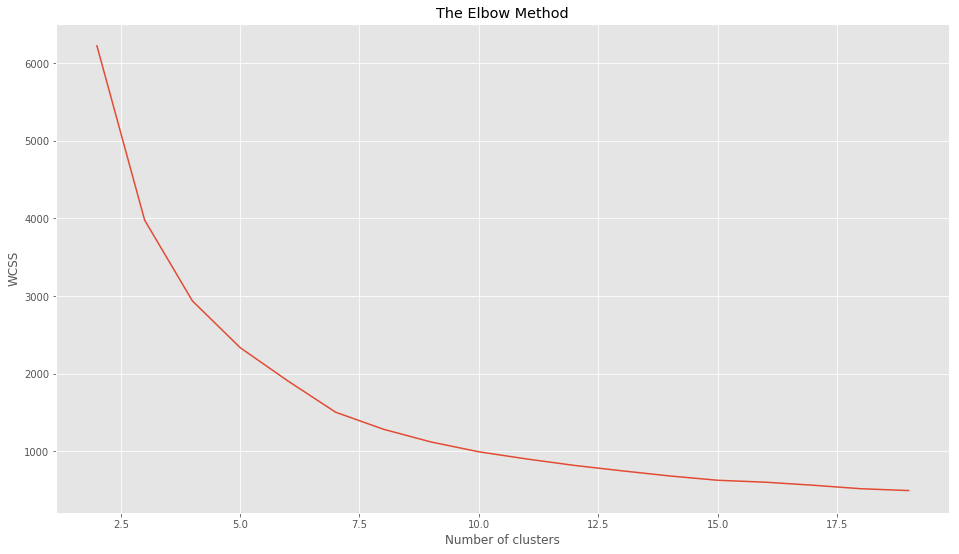

In [65]:
# Grafica de la suma de las distancias
plt.plot(Nc, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
kmeans=KMeans(n_clusters=5,init = 'k-means++', random_state = 42).fit(scale(X))

labels = kmeans.predict(scale(X))

rfmTable['labels']=labels

C:\Users\jalvarez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\jalvarez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


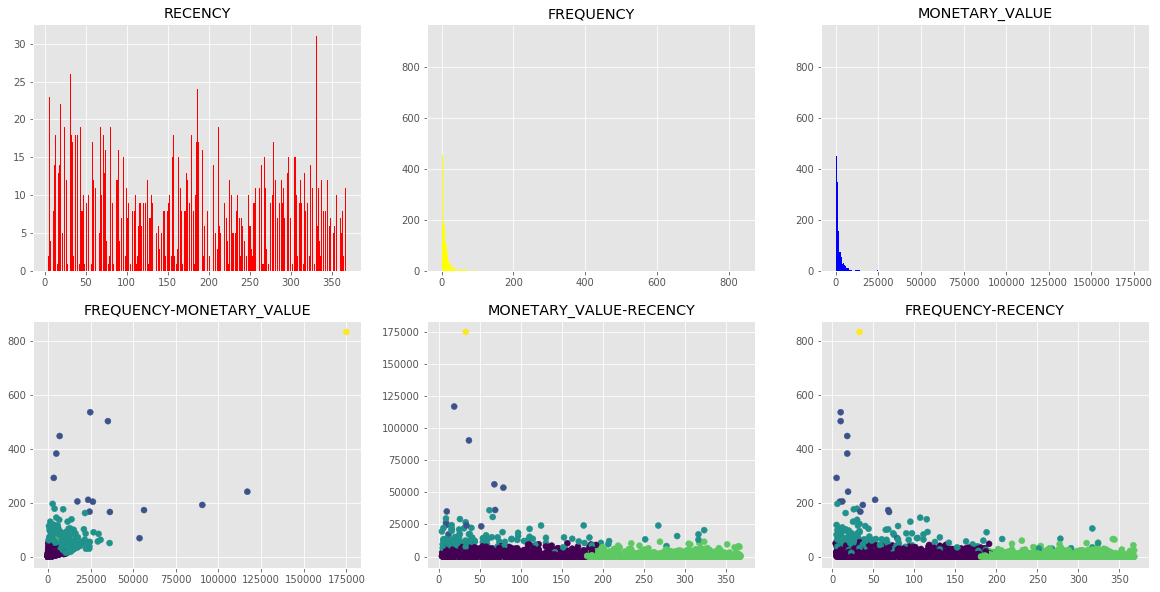

In [71]:
figure, axes_array = plt.subplots(2,3) #Nos determina cuantos "subplots" aqui 2x2 = 4
figure.set_size_inches(20,10) #tamaño de cada subplot
axes_array[0,0].hist(rfmTable.RECENCY, 500, color = 'red')
axes_array[0, 0].set_title('RECENCY')
axes_array[0,1].hist(rfmTable.FREQUENCY, 500, color = 'yellow')
axes_array[0, 1].set_title('FREQUENCY')
axes_array[0,2].hist(rfmTable.MONETARY_VALUE, 500, color = 'blue')
axes_array[0, 2].set_title('MONETARY_VALUE')
axes_array[1,0].scatter(rfmTable.MONETARY_VALUE, rfmTable.FREQUENCY, c=rfmTable['labels'])
axes_array[1, 0].set_title('FREQUENCY-MONETARY_VALUE')
axes_array[1,1].scatter(rfmTable.RECENCY, rfmTable.MONETARY_VALUE,c=rfmTable['labels'])
axes_array[1, 1].set_title('MONETARY_VALUE-RECENCY')
axes_array[1,2].scatter(rfmTable.RECENCY, rfmTable.FREQUENCY, c=rfmTable['labels'])
axes_array[1, 2].set_title('FREQUENCY-RECENCY')


plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# xs = rfmTable.RECENCY
# ys = rfmTable.FREQUENCY
# zs = rfmTable.MONETARY_VALUE
# ax.scatter(xs, ys, zs, marker=m)

# ax.set_xlabel('RECENCY')
# ax.set_ylabel('FREQUENCY')
# ax.set_zlabel('MONETARY_VALUE')

# plt.show()

## Normalizacion de la variable RECENCY
Esta variable no responde a la misma distribucion que el resto

In [ ]:
plt.hist(rfmTable.RECENCY.apply(np.log10),1000)
plt.show()

In [ ]:
rfmTable.RECENCY.head()

In [ ]:
rfmTable.RECENCY.apply(np.log10)

## Clusterizacion de clientes (Con estandarizacion de las variables)